<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Aberration-Analysis" data-toc-modified-id="Aberration-Analysis-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Aberration Analysis</a></span></li><li><span><a href="#Mark's-Fourier-Optics-Code" data-toc-modified-id="Mark's-Fourier-Optics-Code-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Mark's Fourier Optics Code</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#General-Warning-about-Computational-Intensity:" data-toc-modified-id="General-Warning-about-Computational-Intensity:-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>General Warning about Computational Intensity:</a></span></li></ul></li><li><span><a href="#Introduction" data-toc-modified-id="Introduction-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Setup" data-toc-modified-id="Setup-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Setup</a></span></li><li><span><a href="#Function-Definitions" data-toc-modified-id="Function-Definitions-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Function Definitions</a></span><ul class="toc-item"><li><span><a href="#1D-Fourier-Wrappers" data-toc-modified-id="1D-Fourier-Wrappers-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>1D Fourier Wrappers</a></span><ul class="toc-item"><li><span><a href="#fft()" data-toc-modified-id="fft()-2.3.1.1"><span class="toc-item-num">2.3.1.1&nbsp;&nbsp;</span>fft()</a></span></li><li><span><a href="#ifft()" data-toc-modified-id="ifft()-2.3.1.2"><span class="toc-item-num">2.3.1.2&nbsp;&nbsp;</span>ifft()</a></span></li><li><span><a href="#propagate()" data-toc-modified-id="propagate()-2.3.1.3"><span class="toc-item-num">2.3.1.3&nbsp;&nbsp;</span>propagate()</a></span><ul class="toc-item"><li><span><a href="#Some-theory" data-toc-modified-id="Some-theory-2.3.1.3.1"><span class="toc-item-num">2.3.1.3.1&nbsp;&nbsp;</span><strong>Some theory</strong></a></span></li><li><span><a href="#Calculation" data-toc-modified-id="Calculation-2.3.1.3.2"><span class="toc-item-num">2.3.1.3.2&nbsp;&nbsp;</span>Calculation</a></span></li></ul></li></ul></li></ul></li></ul></li><li><span><a href="#Building-to-full-Calculations" data-toc-modified-id="Building-to-full-Calculations-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Building to full Calculations</a></span><ul class="toc-item"><li><span><a href="#Gaussian-Beam-Propagation" data-toc-modified-id="Gaussian-Beam-Propagation-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Gaussian Beam Propagation</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Results" data-toc-modified-id="Results-3.1.0.0.1"><span class="toc-item-num">3.1.0.0.1&nbsp;&nbsp;</span>Results</a></span></li></ul></li></ul></li><li><span><a href="#Focused-2D-Gaussian-Beam" data-toc-modified-id="Focused-2D-Gaussian-Beam-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Focused 2D Gaussian Beam</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Results" data-toc-modified-id="Results-3.1.1.0.1"><span class="toc-item-num">3.1.1.0.1&nbsp;&nbsp;</span>Results</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Clipped-Focused-Gaussian-Beam" data-toc-modified-id="Clipped-Focused-Gaussian-Beam-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Clipped Focused Gaussian Beam</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Results" data-toc-modified-id="Results-3.2.0.0.1"><span class="toc-item-num">3.2.0.0.1&nbsp;&nbsp;</span>Results</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#A-single-abberation" data-toc-modified-id="A-single-abberation-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>A single abberation</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Results" data-toc-modified-id="Results-3.3.0.0.1"><span class="toc-item-num">3.3.0.0.1&nbsp;&nbsp;</span>Results</a></span></li></ul></li></ul></li></ul></li></ul></li></ul></div>

# Aberration Analysis

This code is for analyzing and characterizing aberrations and clippings of a focused gaussian beam.

# Mark's Fourier Optics Code

### General Warning about Computational Intensity:
In fourier optics, it's very easy to need to define very dense objects and calculate many of them in order to obtain the type of precision you desire. These objects can easily take up a lot of RAM on your computer, so you may consider (if you want to do lengthy calculations) doing these calculations on a computer with significant RAM (e.g. 16GB+ was sufficient for my homemwork's purposes.)

## Introduction



This ipynb contains code that I wrote mostly coming from the numerical homework assignments from my Fourier Optics course. It contains, broadly speaking, 3 things:
1. 1D and 2D Wrappers for scipy's fft algorithms that take Fourier transforms and propagate input beams, and descriptions of these wrappers
2. Many examples of usage
3. Several illustration of numerical artifacts & breakdowns of various common assumptions in Fourier optics

A useful textbook for this material is Goodman's "Fourier Optics".

Note that some of the beam propagations in this code can become relatively computationally expensive. In order to do these calculations accurately, one must provide sufficient sampling of the field being propagated or transformed, and if doing significantly complicated diffractions or similar methods, it can be very useful to create and plot a large sum of data as the beam propagates through space (see the colorplots below).


## Setup

In [6]:
import numpy as np
import matplotlib as mpl
from mpl_toolkits.mplot3d import axes3d
from matplotlib.pyplot import *
import scipy.fftpack as FT
import scipy.special as special
import math as m
import sys
from matplotlib import rcParams
from matplotlib import style
%matplotlib inline

# ## set matplotlib plot defaults :D
# Style controls many default colors in matplotlib plots.
# Change the following if you don't like dark backgrounds. Many other options.
style.use(['seaborn-darkgrid'])
#style.use(['seaborn-dark-palette'])

### old solarized stuff
# style.use(['dark_background'])
# mpl.rcParams['axes.facecolor'] = '#0a0a0a'
# the default cycling of colors in this mode isn't very good.
# mpl.rcParams['axes.prop_cycle'] = cycler('color', ['r','c','g','#FFFFFF','y','m','b'])
### General
rcParams['figure.figsize'] = (18.0, 8.0)
rcParams['axes.grid'] = True
rcParams['axes.formatter.useoffset'] = False
rcParams['grid.alpha'] = 0.3
rcParams['axes.formatter.limits'] = (0,3)
# jet is awful.
rcParams['image.cmap'] = 'viridis'
# to see all available options, decomment this line.
# print(mpl.rcParams)
rcParams['font.size'] = 14

In [7]:
%%javascript
// the above line makes this entire cell run javascript commands.

// this gets rid of scroll bars on the output by default. It's in javascript because javascript is used 
// by Jupyter to actually render the notebook display.
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

## Function Definitions

### 1D Fourier Wrappers

#### fft()

In [8]:
def fft(field, xpts, normalize=True):
    """
    @param field: the field amplitudes of the field to be transformed
    @param xpts: the positions that the field array above have been sampled at. Note that this function assumes
        evenly spaced points.
    @param normalize: This normalizes the fft to the continuous version, multiplying the spectrum by the spacing.
        If using my Ifft function, this should match the de-normalize option there. 
        
    This is a wrapper for the fourier-transform function from Scipy.
    Takes the fourier transform of a 1-dimensional field, i.e. g{x} -> g_f{f_x}
    returns the transform amplitudes and the frequencies in two objects. By default, it normalizes the FFT, 
    taking into account the spacing of the points your field is defined over. This makes the FFT match the 
    result you'd calculate from a continuous fourier transform, up to a factor of (2pi)^(?) depending on your
    FT convention.
    """

    assert(len(xpts) > 1)
    assert(len(xpts) == len(field))
    
    # assumes evenly spaced.
    spacing = (max(xpts) - min(xpts))/(len(xpts) - 1)
    freqs = FT.fftshift(FT.fftfreq(len(xpts), spacing))
    fieldFFT = FT.fftshift(FT.fft(FT.ifftshift(field)))
    if normalize: 
        fieldFFT *= spacing
    return {'Freq': freqs, 'Amp': fieldFFT}

#### ifft()

In [9]:
def ifft(fieldFFT, xpts, denormalize=True):
    """
    @param fieldFFT: the field frequency amplitudes 
    
    A wrapper for the inverse Fourier-transform function from Scipy
    Takes the inverse fourier transform of a 1-dimensional field, i.e. g_f{f_x} -> g{x}
    returns the amplitudes (presumably you already have the x points for those amplitudes.)
    
    By default, it re-compensates for the normalization done by default in my FFT wrapper, 
    discussed above.
    """
    assert(len(fieldFFT) > 1)
    
    spacing = (max(xpts) - min(xpts))/(len(xpts) - 1)
    if denormalize:
        fieldFFT /= spacing
    field = FT.fftshift(FT.ifft(FT.ifftshift(fieldFFT)))
    return {'Field': field, 'xpts': xpts}

#### propagate()

##### **Some theory**

The transfer function $T\{f,z_{fin}\}$ in free space for a frequency $f$ from position $z=0$ to position $z=z_{fin}$ in a medium with index of refraction $n$ is
$$
    T\{f,z_{fin}\} = \exp{\bigg\{ i k  z_{fin} \times \sqrt{1 - \bigg(\frac{\lambda f}{n}\bigg)^2}\bigg\}},\\
    k = \frac{2\pi}{\lambda}.
$$

##### Calculation

In [10]:
def fft2D(field, xpts, ypts, normalize=True):
    """
    :@param field: the field amplitudes of the field to be transformed
    :@param xpts: the positions that the field array above have been sampled at. Note that this function assumes
        evenly spaced points.
    :@param ypts: the positions that the field array above have been sampled at. Note that this function assumes
        evenly spaced points.
    Takes the fourier transform of a 2-dimensional field, i.e. g{x} -> g_f{f_x}
    returns the transform amplitudes and the frequencies in two objects.
    """
    assert(len(xpts) > 1)
    assert(len(ypts) > 1)
    assert(len(xpts) == len(field))
    assert(len(ypts) == len(field[0]))
    xspacing = (max(xpts) - min(xpts))/(len(xpts) - 1)    
    yspacing = (max(ypts) - min(ypts))/(len(ypts) - 1)    
    xFreqs = FT.fftshift(FT.fftfreq(len(xpts), xspacing))
    yFreqs = FT.fftshift(FT.fftfreq(len(ypts), yspacing))
    fieldFFT = FT.fftshift(FT.fft2(FT.ifftshift(field)))
    if normalize:
        fieldFFT *= (xspacing * yspacing)
    return {'Amp': fieldFFT, 'xFreq': xFreqs, 'yFreq': yFreqs}


def ifft2D(field2DFFT, xpts, ypts, denormalize=True):
    """
    @param field2DFFT: the 2D field frequency amplitudes 
    
    Takes the inverse fourier transform of a 2-dimensional field;
    returns the amplitudes (presumably you already have the x points for those amplitudes.)
    """
    assert(len(field2DFFT) > 1)
    field = FT.fftshift(FT.ifft2(FT.ifftshift(field2DFFT)))
    if denormalize:
        xspacing = (max(xpts) - min(xpts))/(len(xpts) - 1)    
        yspacing = (max(ypts) - min(ypts))/(len(ypts) - 1)    
        field /= xspacing * yspacing
    return {'Field': field, 'xpts': xpts, 'ypts': ypts}


In [11]:
def propagate2D(field, fieldPosX, fieldPosY, z_fin, wavelength, n=1):
    """
    Propagate a field a given distance.
    """
    k = 2 * np.pi * n / wavelength
    # Important assumption in the following line.
    xSpacing = (max(fieldPosX) - min(fieldPosX))/(len(fieldPosX) - 1)
    if not (xSpacing <= wavelength / 2):
        print('WARNING: spacing is not sufficient to see evanescant frequencies in X direction.'
              ' Spacing is ' + str(xSpacing))
    ySpacing = (max(fieldPosY) - min(fieldPosY))/(len(fieldPosY) - 1)
    if not (ySpacing <= wavelength / 2):
        print('WARNING: spacing is not sufficient to see evanescant frequencies in Y direction.'
              ' Spacing is ' + str(ySpacing))
    theFft = fft2D(field, fieldPosX, fieldPosY)
    #fieldFFT, xFreqs, yFreqs = 
    transferFunc = np.zeros((len(theFft['xFreq']), len(theFft['yFreq']))).astype(complex)
    for x in range(len(theFft['xFreq'])):
        for y in range(len(theFft['yFreq'])):
            transferFunc[x][y] = np.exp(1j * k * z_fin * 
                                        np.sqrt((1 - ((wavelength / n) * theFft['xFreq'][x])**2 
                                                 - ((wavelength / n) * theFft['yFreq'][y])**2).astype(complex)))
    propFieldFFT = theFft['Amp'] * transferFunc
    field = np.array([], dtype=complex)
    propField = ifft2D(propFieldFFT, fieldPosX, fieldPosY)
    return propField

# Building to full Calculations

## Gaussian Beam Propagation

In [12]:
from fitters import gaussian_2d

In [13]:
# initialize the field
xAxis = np.linspace(-6e-3, 6e-3, 500)
yAxis = np.linspace(-6e-3, 6e-3, 500)
# e.g. this 1/10th the waist of the input ot the sill lens.
waist = 1e-3
rayleighLength = np.pi*waist**2/850e-9
print(rayleighLength)

3.6959913571644623


Careful thinking about the field vs. intensity fits here.

$$
E\{x\} = \exp\Big\{-\frac{x^2}{\sigma_E^2}\Big\}
$$
$$
I\{x\} =E\{x\}^2= \exp\Big\{-2\frac{x^2}{\sigma_E^2}\Big\}=\exp\Big\{-2\frac{x^2}{w^2}\Big\}
$$

The waist of the field is the "1/e" $\sigma$ of the E-field.

But my "gaussian_2d" function is defined as
$$
\exp\Big\{ -\frac{x^2}{2\sigma^2} \Big\}
$$
so $w^2=2\sigma^2$, $\sigma=w/\sqrt{2}$, so knowing $w$, you should plug in $w/\sqrt{2}$ for the waist here.

In [14]:
field0 = np.zeros((len(xAxis), len(yAxis)))
predField = np.zeros((len(xAxis), len(yAxis)))
newWaist = waist*np.sqrt(1+(10/rayleighLength)**2)
for i, x in enumerate(xAxis):
    for j, y in enumerate(yAxis):
        field0[i,j] = gaussian_2d.f((x,y), 1, 0,0, waist/np.sqrt(2), waist/np.sqrt(2), 0, 0)        
        predField[i, j] = waist/newWaist * gaussian_2d.f((x,y), 1, 0,0, newWaist/np.sqrt(2), newWaist/np.sqrt(2), 0, 0)

In [15]:
# The following is pretty standard for generating a picture of how the field propagates
positions = np.linspace(0, 10, 2)
# important to set as complex here, else it tries to convert `to real immediately.
allData = np.zeros((len(positions), field0.shape[0], field0.shape[1]), dtype=complex)
for pos in range(len(positions)):
    allData[pos] = propagate2D(field0, xAxis, yAxis, positions[pos], 850e-9)['Field']

##### Results

2716.17955672
2716.17955672
2716.01301398


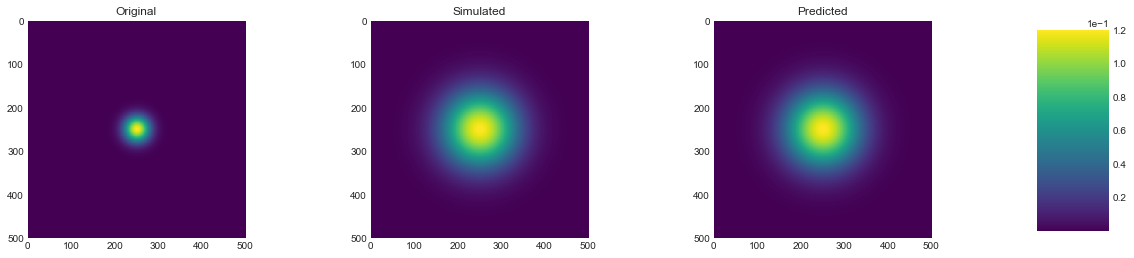

In [16]:
# Two subplots, the axes array is 1-d
f, axarr = subplots(1,3)
f.set_figwidth(20)
axarr[0].imshow(abs(field0)**2)
axarr[0].grid(0)
axarr[0].set_title('Original')
for i, ax in enumerate(axarr[1:-1]):
    im = ax.imshow(abs(allData[i+1])**2)
    ax.grid(0)
    ax.set_title('Simulated')
axarr[-1].imshow(abs(predField)**2)
axarr[-1].grid(0)
axarr[-1].set_title('Predicted')
print(np.sum(abs(field0)**2))
print(np.sum(abs(allData[-1])**2))
print(np.sum(abs(predField)**2))
f.subplots_adjust(right=0.8)
cbar_ax = f.add_axes([0.85, 0.15, 0.05, 0.7])
f.colorbar(im, cax=cbar_ax)

very good matching. In the plot below, you can see the difference between the predicted and simulated is some very high order frequencies that spread out fast in the simulation and hit the edges of the numerical region.

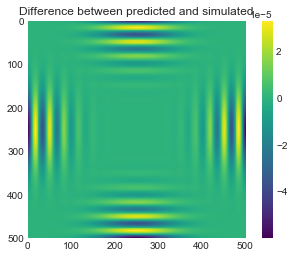

In [17]:
imshow(abs(predField)**2-abs(allData[-1])**2)
title('Difference between predicted and simulated')
grid(0)
colorbar()

### Focused 2D Gaussian Beam

Focused pretty tightly right now.

In [19]:
# initialize the field
xAxis = np.linspace(-1e-3, 1e-3, 500)
yAxis = np.linspace(-1e-3, 1e-3, 500)
# e.g. this 1/10th the waist of the input ot the sill lens.
waist = 5e-4
rayleighLength = np.pi*waist**2/850e-9
focalLength=0.2

In [20]:
field0 = np.zeros((len(xAxis), len(yAxis))).astype(complex)
newWaist = waist*np.sqrt(1+(10/rayleighLength)**2)
for i, x in enumerate(xAxis):
    for j, y in enumerate(yAxis):
        focusingPhase = np.exp(-1j * (2*np.pi / 850e-9) * focalLength * np.sqrt(1+(x**2+y**2)/focalLength**2))
        gaussianProfile = gaussian_2d.f((x,y), 1, 0,0, waist/np.sqrt(2), waist/np.sqrt(2), 0, 0)
        field0[i,j] = gaussianProfile * focusingPhase

In [21]:
# The following is pretty standard for generating a picture of how the field propagates
positions = np.linspace(0, focalLength, 5)
# important to set as complex here, else it tries to convert `to real immediately.
allData = np.zeros((len(positions), field0.shape[0], field0.shape[1]), dtype=complex)
for pos in range(len(positions)):
    allData[pos] = propagate2D(field0, xAxis, yAxis, positions[pos], 850e-9)['Field']

##### Results

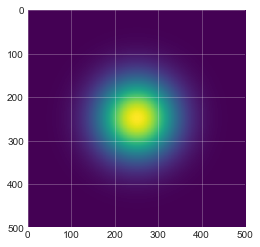

In [22]:
imshow(abs(field0)**2)

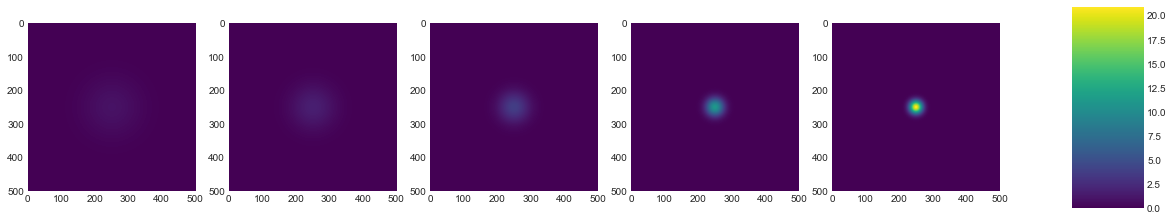

In [23]:
# Two subplots, the axes array is 1-d
f, axarr = subplots(1,5)
f.set_figwidth(20)
ma = max(abs(allData).flatten())**2
mi = min(abs(allData).flatten())**2
axarr[0].imshow(abs(field0)**2, vmin=mi, vmax=ma)
axarr[0].grid(0)
for i, ax in enumerate(axarr[1:]):
    im = ax.imshow(abs(allData[i+1])**2, vmin=mi, vmax=ma)
    ax.grid(0)
f.subplots_adjust(right=0.8)
cbar_ax = f.add_axes([0.85, 0.15, 0.05, 0.7])
f.colorbar(im, cax=cbar_ax)

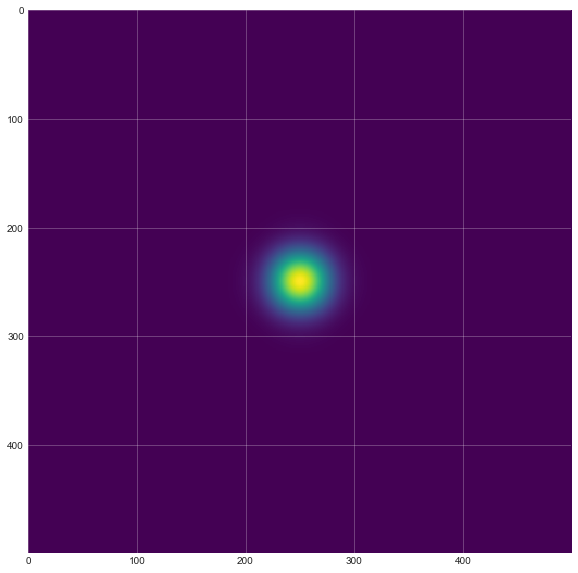

In [24]:
figure(figsize=(10,10))
imshow(abs(allData[-1]))

## Clipped Focused Gaussian Beam

In [48]:
# initialize the field
xAxis = np.linspace(-0.5e-3, 0.5e-3, 500)
yAxis = np.linspace(-0.5e-3, 0.5e-3, 500)
# e.g. this 1/10th the waist of the input ot the sill lens.
waist = 0.5e-3
rayleighLength = np.pi*waist**2/850e-9
focalLength=0.1

In [53]:
field0 = np.zeros((len(xAxis), len(yAxis))).astype(complex)
#aperture = np.zeros((len(xAxis), len(yAxis)))
newWaist = waist*np.sqrt(1+(10/rayleighLength)**2)
for i, x in enumerate(xAxis):
    for j, y in enumerate(yAxis):
        focusingPhase = np.exp(-1j * (2*np.pi / 850e-9) * focalLength * np.sqrt(1+(x**2+y**2)/focalLength**2))
        rho = np.sqrt(x**2+y**2)
        aperture=int(rho<=waist)            
        gaussianProfile = gaussian_2d.f((x,y), 1, 0,0, waist/np.sqrt(2), waist/np.sqrt(2), 0, 0)
        field0[i,j] = gaussianProfile * focusingPhase * aperture

In [54]:
# The following is pretty standard for generating a picture of how the field propagates
positions = np.linspace(0.6*focalLength, 1.2*focalLength, 20)
# important to set as complex here, else it tries to convert `to real immediately.
allData = np.zeros((len(positions), field0.shape[0], field0.shape[1]), dtype=complex)
for pos in range(len(positions)):
    allData[pos] = propagate2D(field0, xAxis, yAxis, positions[pos], 850e-9)['Field']

##### Results

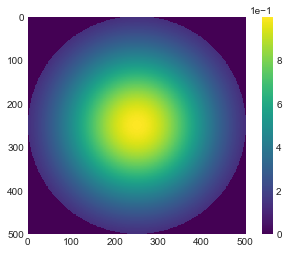

In [55]:
imshow(abs(field0)**2)
colorbar()
grid(0)

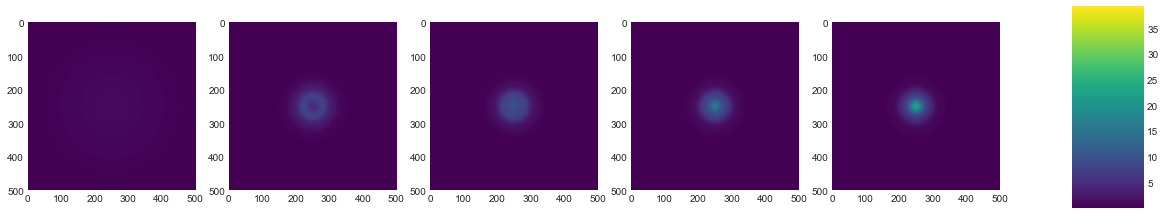

In [56]:
# Two subplots, the axes array is 1-d
f, axarr = subplots(1,5)
f.set_figwidth(20)
ma = max(abs(allData).flatten())**2
mi = min(abs(allData).flatten())**2
axarr[0].imshow(abs(field0)**2, vmin=mi, vmax=ma)
axarr[0].grid(0)
for i, ax in enumerate(axarr[1:]):
    im = ax.imshow(abs(allData[i+1])**2, vmin=mi, vmax=ma)
    ax.grid(0)
f.subplots_adjust(right=0.8)
cbar_ax = f.add_axes([0.85, 0.15, 0.05, 0.7])
f.colorbar(im, cax=cbar_ax)

In [59]:
import ipywidgets as widgets
from ipywidgets import interact, IntSlider, RadioButtons
selector = widgets.IntSlider(min=0, max=len(allData)-1)
# decorate the plot function with an environment from the UIs:
@interact(which=selector)
def plot(which):
    imshow(abs(allData[which]))
    grid(0)

A Jupyter Widget

## A single abberation

Coma in the x plane.

In [32]:
# initialize the field
xAxis = np.linspace(-1e-3, 1e-3, 1000)
yAxis = np.linspace(-1e-3, 1e-3, 1000)
# e.g. this 1/10th the waist of the input ot the sill lens.
waist = 0.5e-3
rayleighLength = np.pi*waist**2/850e-9
focalLength=0.1

In [33]:
field0 = np.zeros((len(xAxis), len(yAxis))).astype(complex)
abberationPhase = np.zeros((len(xAxis), len(yAxis)))
#aperture = np.zeros((len(xAxis), len(yAxis)))
for i, x in enumerate(xAxis):
    for j, y in enumerate(yAxis):
        focusingPhase = np.exp(-1j * (2*np.pi / 850e-9) * focalLength * np.sqrt(1+(x**2+y**2)/focalLength**2))
        rho_0 = np.sqrt(x**2+y**2)
        rho = rho_0 / waist
        theta = np.arctan2(x,y)
        aberration = np.exp(-1j * np.sqrt(8) * (3 * rho**3 - 2 * rho) * np.cos(theta) )
        abberationPhase[i,j] = np.sqrt(8) * (3 * rho**3 - 2 * rho) * np.cos(theta)
        gaussianProfile = gaussian_2d.f((x,y), 1, 0,0, waist/np.sqrt(2), waist/np.sqrt(2), 0, 0)
        field0[i,j] = gaussianProfile * focusingPhase * aberration

In [34]:
# The following is pretty standard for generating a picture of how the field propagates
positions = np.linspace(0.4*focalLength, 0.9*focalLength, 9)
# important to set as complex here, else it tries to convert `to real immediately.
allData = np.zeros((len(positions), field0.shape[0], field0.shape[1]), dtype=complex)
for pos in range(len(positions)):
    allData[pos] = propagate2D(field0, xAxis, yAxis, positions[pos], 850e-9)['Field']

##### Results

IndexError: index 9 is out of bounds for axis 0 with size 9

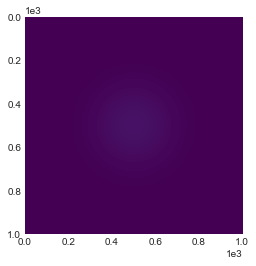

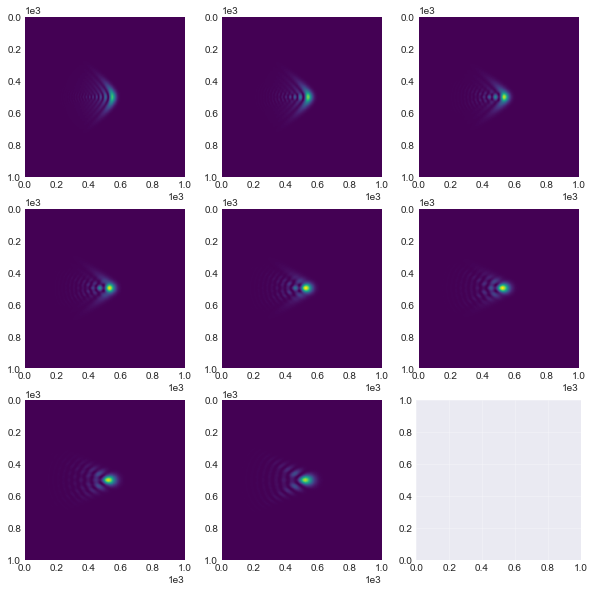

In [35]:
# Two subplots, the axes array is 1-d
ma = max(abs(allData).flatten())**2
mi = min(abs(allData).flatten())**2
imshow(abs(field0)**2, vmin=mi, vmax=ma)
grid(0)
f, axarr = subplots(3,3)
f.set_figwidth(10)
f.set_figheight(10)
count = 0
for axr in axarr:
    for ax in axr:
        im = ax.imshow(abs(allData[count+1])**2, vmin=mi, vmax=ma)
        ax.grid(0)
        count += 1
f.subplots_adjust(right=0.8)
cbar_ax = f.add_axes([0.85, 0.15, 0.05, 0.7])
f.colorbar(im, cax=cbar_ax);